<a href="https://colab.research.google.com/github/debfdias/API-default/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [127]:
dengue = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue.csv", encoding ="UTF-8")
emlurb = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb.csv", encoding ="UTF-8")

dengue19 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue2019.csv", encoding ="UTF-8", error_bad_lines=False)
emlurb19 = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb2019.csv", encoding ="UTF-8")


b'Skipping line 108: expected 126 fields, saw 127\nSkipping line 1485: expected 126 fields, saw 127\nSkipping line 2584: expected 126 fields, saw 127\nSkipping line 4415: expected 126 fields, saw 127\nSkipping line 5659: expected 126 fields, saw 127\nSkipping line 6469: expected 126 fields, saw 127\n'


## **Detalhamento de datasets**


In [ ]:
emlurb.head()

In [ ]:
dengue.head()

## **Reorganização de Datasets e merge**

Como o data frame com dados de dengue é muito robusto, usaremos apenas as colunas que nos interessam. E estas são: bairro e data de registro do caso. Agrupamos os casos por mês e totalizamos as ocorrências mensais. Outras análise podem ser interessantes, como agrupamento por bairro e por dia.

 ## Dados de 2020


In [ ]:
# Utilizamos apenas as colunas de bairro e de data do registro do caso

dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data['dt_notificacao'] = pd.to_datetime(dengue_data['dt_notificacao'])

# Número de casos por mês
dengue_data = dengue_data.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data = dengue_data.drop(dengue_data.index[[0]])

# Número de casos por bairro
# dengue_data.groupby("no_bairro_residencia").size().sort_values(ascending=False).reset_index(name="CASOS_DENGUE")

# Número de casos por dia
# dengue_data["dt_notificacao"].value_counts().sort_values(ascending=False)

display(dengue_data)

In [ ]:
# Utilizamos apenas as colunas de bairro, data de demanda e tipo de serviço

emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

print("Número de solicitações de drenagem registradas em 2020 = " + str(len(emlurb_data.index)))

# Número de solicitações por mês
emlurb_data = emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")

# Número de casos por bairro
# emlurb_data.groupby("BAIRRO").size().sort_values(ascending=False).reset_index(name="CASOS_DENGUE")

# Número de casos por dia
# emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="D")]).size().sort_values(ascending=False).reset_index(name="CHAMADOS_EMLURB")

display(emlurb_data)

Agora que temos duas tabelas, **dengue_data**, com informação dos casos de dengue por mês, e **emlurb_data**, com informação dos pedidos de drenagem solicitados pela população por mês, faremos o merge das duas tabelas para unificar todos esses dados.


In [ ]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info)

Com a tabela **crossed_info**, conseguimos reunir o número de casos de dengue e o número de chamados de drenagem por mês no grande Recife. Ainda podemos cruzar as informações com outros parâmetros como bairro, diária, status de solicitação etc.

## Dados de 2019

In [235]:
# Utilizamos apenas as colunas de bairro e de data do registro do caso

dengue_data19 = dengue19[["no_bairro_residencia", "dt_notificacao"]]
dengue_data19['dt_notificacao'] = pd.to_datetime(dengue_data19['dt_notificacao'])

# Número de casos por mês
dengue_data19 = dengue_data19.groupby([pd.Grouper(key="dt_notificacao", freq="M")]).size().reset_index(name="CASOS_DENGUE")
dengue_data19 = dengue_data19.drop(dengue_data19.index[[12,13]])

display(dengue_data19)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,dt_notificacao,CASOS_DENGUE
0,2019-01-31,91
1,2019-02-28,178
2,2019-03-31,263
3,2019-04-30,485
4,2019-05-31,972
5,2019-06-30,704
6,2019-07-31,1004
7,2019-08-31,868
8,2019-09-30,966
9,2019-10-31,882


In [236]:
# Utilizamos apenas as colunas de bairro, data de demanda e tipo de serviço

emlurb_data19 = emlurb19[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data19["DATA_DEMANDA"] = pd.to_datetime(emlurb_data19["DATA_DEMANDA"])
emlurb_data19 = emlurb_data19[(emlurb_data19.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]

# Número de solicitações por mês
emlurb_data19 = emlurb_data19.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M")]).size().reset_index(name="CHAMADOS_EMLURB")

display(emlurb_data19)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DATA_DEMANDA,CHAMADOS_EMLURB
0,2019-01-31,664
1,2019-02-28,950
2,2019-03-31,740
3,2019-04-30,1052
4,2019-05-31,1132
5,2019-06-30,933
6,2019-07-31,1018
7,2019-08-31,928
8,2019-09-30,884
9,2019-10-31,1049


In [237]:
crossed_info19 = pd.merge(dengue_data19, emlurb_data19, left_on=["dt_notificacao"],right_on=["DATA_DEMANDA"])
display(crossed_info19)

,dt_notificacao,CASOS_DENGUE,DATA_DEMANDA,CHAMADOS_EMLURB
0,2019-01-31,91,2019-01-31,664
1,2019-02-28,178,2019-02-28,950
2,2019-03-31,263,2019-03-31,740
3,2019-04-30,485,2019-04-30,1052
4,2019-05-31,972,2019-05-31,1132
5,2019-06-30,704,2019-06-30,933
6,2019-07-31,1004,2019-07-31,1018
7,2019-08-31,868,2019-08-31,928
8,2019-09-30,966,2019-09-30,884
9,2019-10-31,882,2019-10-31,1049


## **Testes de Hipótese**

O teste de hipótese é um método estatístico usado na tomada de decisões estatísticas usando dados de um conjunto. O teste de hipóteses é basicamente uma suposição que fazemos sobre o parâmetro do dataset.

Agora, ao realizar os t-test, normalmente se tem as seguintes duas hipóteses:

*   Hipóteses nulas: as médias de dois grupos são iguais
*   Hipóteses alternativas: as médias de dois grupos são diferentes (bicaudais)

In [190]:
#Testes de Hipótese para dados de 2020

crossed_info['mes'] = crossed_info.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['05', '06','07'] #meses de chuva 
dengue_data_meses = crossed_info[(crossed_info.mes.isin(meses_analise))]
dengue_data_meses['mes'] = pd.to_numeric(dengue_data_meses['mes'])

# Teste de hipótese para mês de Janeiro e Junho para casos de dengue
th_dengue = stats.ttest_ind(dengue_data_meses['CASOS_DENGUE'], dengue_data_meses['mes'], equal_var=True)
display(th_dengue)

# Teste de hipótese para mês de Janeiro e Junho para solicitações de drenagem
th_emlurb = stats.ttest_ind(dengue_data_meses['CHAMADOS_EMLURB'], dengue_data_meses['mes'], equal_var=True)
display(th_emlurb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ttest_indResult(statistic=2.4688876767532433, pvalue=0.06902913833408653)

Ttest_indResult(statistic=5.156991407515991, pvalue=0.0067119513666034115)

In [198]:
#Testes de Hipótese para dados de 2019

crossed_info19['mes'] = crossed_info19.dt_notificacao.apply(lambda x: x.strftime('%m'))
meses_analise = ['01', '02', '06','07'] #meses de chuva 
dengue_data19_meses = crossed_info19[(crossed_info19.mes.isin(meses_analise))]
dengue_data19_meses['mes'] = pd.to_numeric(dengue_data19_meses['mes'])

# Teste de hipótese para mês de Janeiro e Junho para casos de dengue
th_dengue = stats.ttest_ind(dengue_data19_meses['CASOS_DENGUE'], dengue_data19_meses['mes'], equal_var=True)
display(th_dengue)

# Teste de hipótese para mês de Janeiro e Junho para solicitações de drenagem
th_emlurb = stats.ttest_ind(dengue_data19_meses['CHAMADOS_EMLURB'], dengue_data19_meses['mes'], equal_var=True)
display(th_emlurb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Ttest_indResult(statistic=2.2563777781667094, pvalue=0.06487016127243608)

Ttest_indResult(statistic=11.381178797673211, pvalue=2.7575959515653668e-05)

O **p-value** é definido como a probabilidade de se
observar um valor da estatística de teste maior ou
igual ao encontrado. Tradicionalmente, o valor de corte
para rejeitar a hipótese nula é de 0,05, o que significa
que, quando não há nenhuma diferença, um valor tão
extremo para a estatística de teste é esperado em menos
de 5% das vezes

## **Correlações**

Fazer teste de Pearson/Spillman

## **Análise de Gráficos**

Analisaremos a tabela com dados cruzados, **crossed_info**. Coletando o número de casos de dengue e solicitações de drenagem por mês para os anos de 2020 e 2019. 

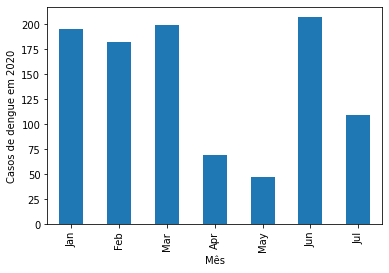

In [160]:
# Análise para Casos de dengue x Meses (primeiro semestre de 2020)

crossed_info['month'] = crossed_info['dt_notificacao'].dt.strftime('%b')
crossed_info.plot(x='month', y='CASOS_DENGUE', kind='bar', legend=False, ylabel='Casos de dengue em 2020', xlabel='Mês')


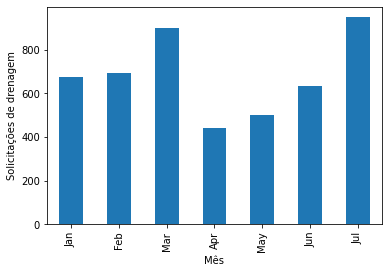

In [199]:
# Análise para solicitações de Drenagem x Meses (primeiro semestre de 2020)

crossed_info.plot(x='month', y='CHAMADOS_EMLURB', kind='bar', legend=False, ylabel='Solicitações de drenagem', xlabel='Mês')


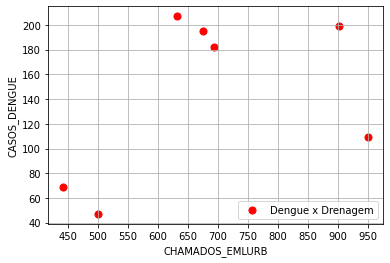

In [234]:
# Gráfico tipo scatter relacionando Casos dengue x Solicitações de drenagens em 2020

crossed_info.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', s = 50, c = 'red', label='Dengue x Drenagem',ylabel='Solicitações de drenagem', xlabel='Casos de dengue', grid=True, xticks=[450,550,500,600,650,700,750,800,850,900,950]);

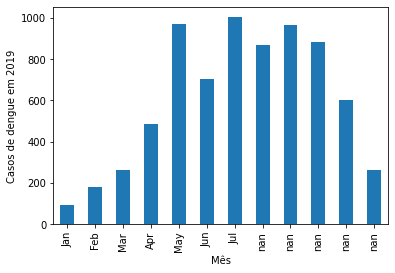

In [163]:
# Análise para Casos de dengue x Meses (primeiro semestre de 2019)

crossed_info19['month'] = crossed_info['dt_notificacao'].dt.strftime('%b')
crossed_info19.plot(x='month', y='CASOS_DENGUE', kind='bar', legend=False, ylabel='Casos de dengue em 2019', xlabel='Mês')


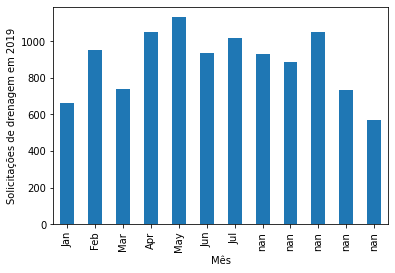

In [164]:
# Análise para solicitações de Drenagem x Meses (primeiro semestre de 2019)

crossed_info19.plot(x='month', y='CHAMADOS_EMLURB', kind='bar', legend=False, ylabel='Solicitações de drenagem em 2019', xlabel='Mês')


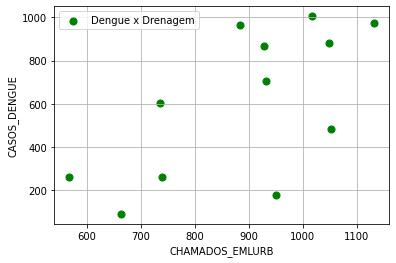

In [238]:
# Gráfico tipo scatter relacionando Casos dengue x Solicitações de drenagens em 2019

crossed_info19.plot.scatter(x = 'CHAMADOS_EMLURB', y = 'CASOS_DENGUE', s = 50, c = 'green', label='Dengue x Drenagem',ylabel='Solicitações de drenagem', xlabel='Casos de dengue', grid=True);

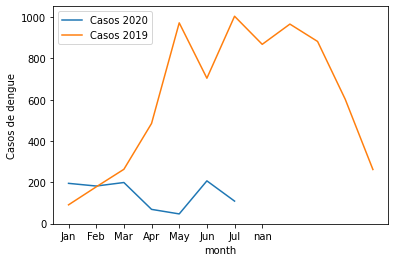

In [ ]:
# Comparação de casos de dengue para anos de 2020 e 2019

ax = crossed_info.plot(x='month', y = 'CASOS_DENGUE', ylabel='Casos de dengue', xlabel='Mês', kind = 'line', label='Casos 2020')
crossed_info19.plot(x='month', y = 'CASOS_DENGUE', kind = 'line', ax=ax, label='Casos 2019')

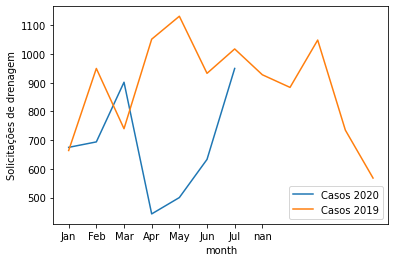

In [ ]:
# Comparação de solicitações de drenagem para anos de 2020 e 2019

ax = crossed_info.plot(x='month', y = 'CHAMADOS_EMLURB', ylabel='Solicitações de drenagem', xlabel='Mês', kind = 'line', label='Casos 2020')
crossed_info19.plot(x='month', y = 'CHAMADOS_EMLURB', kind = 'line', ax=ax, label='Casos 2019')

## **Boxplots e Outliers**

O boxplot tem como objetivo estudar as medidas estatística do conjunto de dados, como variabilidade, média, e outliers.

# **Análise de chamados de drenagem não atendidos pela EMLURB x Casos de Dengue**

In [ ]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data["no_bairro_residencia"].value_counts()

In [ ]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue_data["dt_notificacao"])

dengue_data = dengue_data.groupby(["no_bairro_residencia", "dt_notificacao"]).size().reset_index(name="CASOS_DENGUE")

dengue_data.head()

In [ ]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]

servicos = ["DRENAGEM"]
emlurb_data = emlurb_data[emlurb_data.GRUPOSERVICO_DESCRICAO.isin(servicos)]
emlurb_data = emlurb_data[(emlurb_data.SITUACAO != "ATENDIDA")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])

emlurb_data.head()

In [185]:
emlurb_data = emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.head()


,BAIRRO,DATA_DEMANDA,CHAMADOS_EMLURB
0,AFLITOS,2020-01-15,1
1,AFLITOS,2020-03-03,1
2,AFLITOS,2020-03-04,1
3,AFLITOS,2020-04-17,1
4,AFLITOS,2020-05-07,1


In [ ]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

In [187]:
crossed_info.size

1374

In [188]:
# Analise da correlação

from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Ttest_relResult(statistic=-0.8150945908464697, pvalue=0.4158687761557307)

Há **forte** correlação entre casos diários de dengue com chamados de drenagem não atendidos pela EMLURB no ano de 2020.

Próximos passos:
  * Analizar novamente casos gerais, porém na escala de um mês em vez de diária

## Estudo de gráficos (cenário 2)

Primeiro, analisamos as tabelas com os dados originais. Coletando o número de casos de dengue e solicitações de drenagem por bairro. Em seguida, utilizamos a tabela com informações cruzadas.

IndexError: ignored

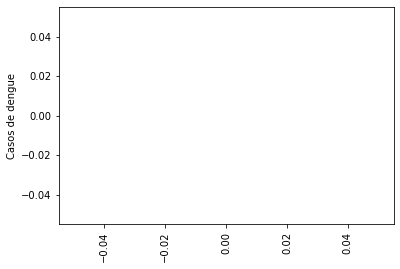

In [399]:
# Análise para Casos de dengue x Bairros (para mais de 10 casos de dengue)

dengue_filter = dengue_data.groupby("no_bairro_residencia").filter(lambda x: len(x) > 10)
dengue_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue', xlabel='Bairros')

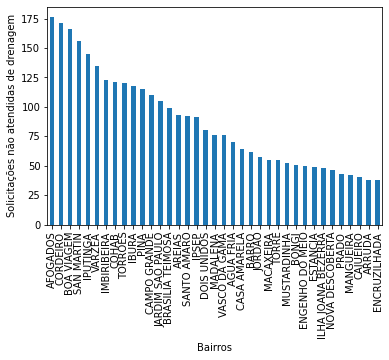

In [137]:
# Análise para Solicitações não atendidas de drenagem x Bairros (para mais de 35 chamados não atendidos)

emlurb_filter = emlurb_data.groupby("BAIRRO").filter(lambda x: len(x) > 35)
emlurb_filter['BAIRRO'].value_counts().plot(kind='bar', ylabel='Solicitações não atendidas de drenagem', xlabel='Bairros')

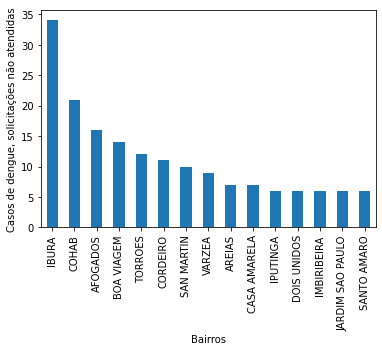

In [139]:
# Análise para Casos de dengue com solicitações não atendidas de drenagem x Bairros (mais de 5 casos)

crossed_info_filter = crossed_info.groupby("no_bairro_residencia").filter(lambda x: len(x) > 5)
crossed_info_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue, solicitações não atendidas', xlabel='Bairros')